# Flajolet Martin Algorithm

In [17]:
L = 64
PHI = 1  

In [18]:
import math

def get_rightmost_set_bit(n: int) -> int:
    if n == 0:
        return L
    return int(math.log2(n & -n) + 1) - 1


def get_rightmost_unset_bit(n: int) -> int:
    return get_rightmost_set_bit(~n)


def set_bit(n: int, pos: int) -> int:
    return n | 1 << pos

In [19]:
import random


def generate_random_stream(total_distinct: int):
    values = list(range(total_distinct))
    while True:
        yield random.choice(values)

In [20]:
def count_distinct_true(stream) -> int:
    return len(set(stream))

In [21]:
import hashlib

def hash_fn(m: int, n: int, x: int, L: int) -> int:
    return (m*x + n) % (2 ** L)

In [22]:
get_rightmost_set_bit(8)

3

In [23]:
get_rightmost_unset_bit(5)

1

In [24]:
def count_distinct_fm(stream) -> int:
    params = []
    for _ in range(7):
        params.append((2 * random.randint(0, 5) + 1, 2 * random.randint(0, 5) + 1))

    estimates = []
    for m, n in params:
        vector, b = 0, 0
        for x in stream:
            y = hash_fn(m, n, x, L)
            i = get_rightmost_set_bit(y)
            vector = set_bit(vector, i)

        b = get_rightmost_unset_bit(vector)
        estimates.append(math.ceil((2 ** b) / PHI))
    return sum(estimates) / len(estimates)

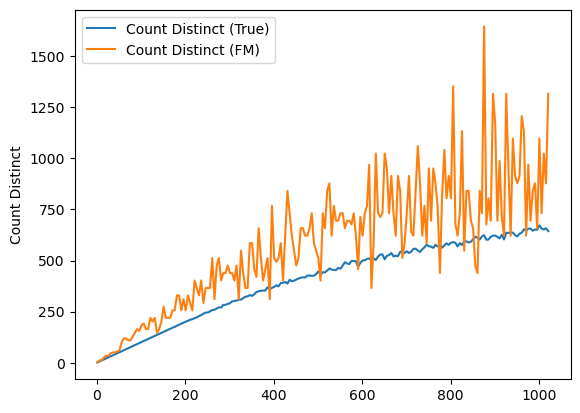

In [25]:
import matplotlib.pyplot as plt

def plot(x, y1, y2):
    plt.ylabel('Count Distinct')
    plt.plot(x, y1, label="Count Distinct (True)")
    plt.plot(x, y2, label="Count Distinct (FM)")

    plt.legend()
    plt.show()

y1 = [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 175, 181, 186, 191, 196, 201, 205, 210, 213, 218, 222, 228, 233, 240, 245, 246, 251, 258, 259, 265, 271, 270, 283, 283, 288, 291, 300, 302, 304, 308, 309, 316, 323, 325, 331, 327, 335, 346, 350, 352, 353, 353, 369, 360, 366, 371, 379, 374, 390, 391, 395, 387, 406, 399, 401, 407, 412, 416, 418, 417, 426, 427, 425, 426, 434, 447, 431, 443, 442, 451, 461, 456, 454, 453, 464, 460, 475, 492, 485, 483, 498, 498, 496, 469, 489, 500, 501, 508, 510, 500, 512, 502, 520, 529, 530, 506, 523, 527, 537, 520, 524, 521, 542, 547, 537, 545, 537, 543, 557, 558, 549, 542, 555, 565, 577, 570, 568, 562, 577, 569, 572, 563, 575, 584, 577, 587, 590, 587, 569, 585, 576, 593, 594, 588, 592, 604, 617, 611, 603, 618, 624, 602, 603, 616, 622, 622, 616, 608, 626, 603, 636, 635, 637, 637, 624, 618, 631, 636, 653, 645, 656, 656, 646, 652, 651, 672, 657, 652, 658, 644]
y2 = [2.0, 10.285714285714286, 12.571428571428571, 25.142857142857142, 34.285714285714285, 32.0, 45.714285714285715, 50.285714285714285, 50.285714285714285, 54.857142857142854, 59.42857142857143, 100.57142857142857, 118.85714285714286, 118.85714285714286, 109.71428571428571, 109.71428571428571, 128.0, 146.28571428571428, 164.57142857142858, 155.42857142857142, 182.85714285714286, 192.0, 164.57142857142858, 164.57142857142858, 219.42857142857142, 201.14285714285714, 219.42857142857142, 146.28571428571428, 164.57142857142858, 201.14285714285714, 274.2857142857143, 219.42857142857142, 219.42857142857142, 219.42857142857142, 256.0, 256.0, 329.14285714285717, 329.14285714285717, 256.0, 310.85714285714283, 256.0, 329.14285714285717, 292.57142857142856, 256.0, 402.2857142857143, 365.7142857142857, 329.14285714285717, 402.2857142857143, 292.57142857142856, 365.7142857142857, 365.7142857142857, 365.7142857142857, 512.0, 310.85714285714283, 475.42857142857144, 512.0, 402.2857142857143, 438.85714285714283, 438.85714285714283, 475.42857142857144, 438.85714285714283, 438.85714285714283, 402.2857142857143, 475.42857142857144, 310.85714285714283, 548.5714285714286, 438.85714285714283, 365.7142857142857, 365.7142857142857, 585.1428571428571, 585.1428571428571, 457.14285714285717, 420.57142857142856, 658.2857142857143, 512.0, 402.2857142857143, 457.14285714285717, 512.0, 310.85714285714283, 768.0, 512.0, 493.7142857142857, 512.0, 585.1428571428571, 402.2857142857143, 621.7142857142857, 841.1428571428571, 731.4285714285714, 621.7142857142857, 548.5714285714286, 475.42857142857144, 512.0, 658.2857142857143, 658.2857142857143, 621.7142857142857, 621.7142857142857, 658.2857142857143, 731.4285714285714, 585.1428571428571, 548.5714285714286, 512.0, 402.2857142857143, 731.4285714285714, 658.2857142857143, 841.1428571428571, 877.7142857142857, 621.7142857142857, 768.0, 694.8571428571429, 694.8571428571429, 731.4285714285714, 731.4285714285714, 658.2857142857143, 694.8571428571429, 694.8571428571429, 676.5714285714286, 731.4285714285714, 621.7142857142857, 457.14285714285717, 713.1428571428571, 621.7142857142857, 731.4285714285714, 768.0, 969.1428571428571, 365.7142857142857, 585.1428571428571, 1024.0, 731.4285714285714, 713.1428571428571, 731.4285714285714, 1024.0, 950.8571428571429, 731.4285714285714, 914.2857142857143, 731.4285714285714, 621.7142857142857, 914.2857142857143, 841.1428571428571, 512.0, 585.1428571428571, 731.4285714285714, 914.2857142857143, 640.0, 621.7142857142857, 841.1428571428571, 1060.5714285714287, 877.7142857142857, 621.7142857142857, 768.0, 585.1428571428571, 950.8571428571429, 694.8571428571429, 950.8571428571429, 877.7142857142857, 758.8571428571429, 438.85714285714283, 822.8571428571429, 1042.2857142857142, 804.5714285714286, 914.2857142857143, 804.5714285714286, 1353.142857142857, 676.5714285714286, 621.7142857142857, 731.4285714285714, 1133.7142857142858, 548.5714285714286, 841.1428571428571, 841.1428571428571, 694.8571428571429, 658.2857142857143, 475.42857142857144, 438.85714285714283, 841.1428571428571, 731.4285714285714, 1645.7142857142858, 676.5714285714286, 804.5714285714286, 694.8571428571429, 1316.5714285714287, 1170.2857142857142, 694.8571428571429, 987.4285714285714, 713.1428571428571, 621.7142857142857, 1316.5714285714287, 950.8571428571429, 621.7142857142857, 1097.142857142857, 914.2857142857143, 877.7142857142857, 914.2857142857143, 1206.857142857143, 1133.7142857142858, 621.7142857142857, 969.1428571428571, 694.8571428571429, 841.1428571428571, 877.7142857142857, 658.2857142857143, 1097.142857142857, 731.4285714285714, 1024.0, 877.7142857142857, 1316.5714285714287]

plot(list(range(1, 1024, 5)), y1, y2)




In [26]:
import re

with open('./jungle-book.txt', 'r') as f:
    text = re.sub('[^a-zA-Z0-9 \n\.]', '', f.read())
    tokens = text.split()

In [27]:
len(tokens), len(set(tokens))

(53850, 7150)

In [28]:
tokens_hashed = [int(hashlib.md5(token.encode()).hexdigest(), 16) % (2 ** L) for token in tokens]
count_distinct_fm(tokens_hashed)

11264.0